**Exploratory Data Analysis on IMDb dataset**

**Description:**

The primary objective of this project is to conduct in-depth exploratory data analysis on the IMDb dataset to extract meaningful insights about movies and TV shows. Through data visualization and statistical analysis, we aim to answer various questions and detect patterns within datasets.

IMDB_Logo_2016.svg

**Importing the important packages**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

**Loading the dataset**

In [ ]:
data = pd.read_csv('/content/IMDB_Movies.csv')
# getting all the data column
pd.set_option('display.max_columns', None)

data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


**A. Cleaning the data**: This is one of the most important steps before proceeding with the analysis. To do this use the knowledge you have learned so far. (deleting columns, removing null values, etc.)

**Task**: Clean the data

In [ ]:
# getting the duplicated value and sorting it in descending order
data.isnull().sum().sort_values(ascending = False)

gross                        884
budget                       492
aspect_ratio                 329
content_rating               303
plot_keywords                153
title_year                   108
director_name                104
director_facebook_likes      104
num_critic_for_reviews        50
actor_3_name                  23
actor_3_facebook_likes        23
num_user_for_reviews          20
color                         19
duration                      15
facenumber_in_poster          13
actor_2_name                  13
actor_2_facebook_likes        13
language                      12
actor_1_name                   7
actor_1_facebook_likes         7
country                        5
cast_total_facebook_likes      0
num_voted_users                0
movie_title                    0
movie_imdb_link                0
genres                         0
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [ ]:
data.shape

(5043, 28)

**Extracting only those columns that are important**


In [ ]:
df = data[['director_name', 'num_critic_for_reviews', 'gross', 'genres', 'actor_1_name', 'movie_title',
          'num_voted_users', 'num_user_for_reviews', 'language', 'budget', 'title_year', 'imdb_score',
          'movie_facebook_likes']]
df.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238,English,300000000.0,2007.0,7.1,0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994,English,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701,English,250000000.0,2012.0,8.5,164000
4,Doug Walker,NaN,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,,NaN,NaN,NaN,7.1,0


**Data Description**
1. **director_name**: Name of the director who directed the movie.
2. **num_critic_for_review**: Critic Review
3. **gross**: Total revenue genreated by the movie
4. **genres**: Category of the movie
5. **actor_1_name**: Lead actor of the movie
6. **movie_title**: Name of the movie
7. **num_voted_users**: Number of people who have voted
8. **num_user_for_reviews**: User Review
9. **language**: Language of the movie
10. **imdb_score**: Score obtained by the movie
11. **movie_facebook_likes**: Total facebook likes

In [ ]:
df.shape

(5043, 13)

In [ ]:
df.isnull().sum().sort_values(ascending = False)

gross                     884
budget                    492
title_year                108
director_name             104
num_critic_for_reviews     50
num_user_for_reviews       20
language                   12
actor_1_name                7
genres                      0
movie_title                 0
num_voted_users             0
imdb_score                  0
movie_facebook_likes        0
dtype: int64

In [ ]:
df.isnull().sum(axis = 1).sort_values(ascending = False)

2342    6
2370    6
279     6
4634    5
2765    5
       ..
1702    0
1701    0
1700    0
1699    0
5042    0
Length: 5043, dtype: int64

**Keeping only values that are not null for gross and budget columns**

In [ ]:
df = df[df['gross'].notna()]
df = df[df['budget'].notna()]

In [ ]:
df.isnull().sum().sort_values(ascending = False)

actor_1_name              3
language                  3
num_critic_for_reviews    1
director_name             0
gross                     0
genres                    0
movie_title               0
num_voted_users           0
num_user_for_reviews      0
budget                    0
title_year                0
imdb_score                0
movie_facebook_likes      0
dtype: int64

In [ ]:
# Getting only null values in actors column
df[df['actor_1_name'].isnull()]

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
4502,Léa Pool,23.0,24784.0,Documentary,NaN,"Pink Ribbons, Inc.",591,10,English,1200000.0,2011.0,7.4,5000
4720,U. Roberto Romano,3.0,2245.0,Documentary,NaN,The Harvest/La Cosecha,57,2,English,560000.0,2011.0,7.2,88
4837,Pan Nalin,15.0,16892.0,Documentary,NaN,Ayurveda: Art of Being,341,12,English,300000.0,2001.0,7.6,379


In [ ]:
df['language'].value_counts().iloc[0:5]

English     3707
French        37
Spanish       26
Mandarin      15
German        13
Name: language, dtype: int64

**Replacing the null values in the language column with English as it has the highest frequency**

In [ ]:
df['language'].replace(np.nan, 'English', inplace = True)

In [ ]:
df.isnull().sum().sort_values(ascending = False)

actor_1_name              3
num_critic_for_reviews    1
director_name             0
gross                     0
genres                    0
movie_title               0
num_voted_users           0
num_user_for_reviews      0
language                  0
budget                    0
title_year                0
imdb_score                0
movie_facebook_likes      0
dtype: int64

In [ ]:
df[df['num_critic_for_reviews'].isnull()]

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
4711,Gene Teigland,NaN,23616.0,Mystery|Thriller,Kendyl Joi,Arnolds Park,94,4,English,600000.0,2007.0,5.6,11


**Getting mathematical answers for num_critic_for_reviews**

In [ ]:
df['num_critic_for_reviews'].describe()

count    3890.000000
mean      163.234704
std       124.053735
min         1.000000
25%        72.250000
50%       134.000000
75%       221.750000
max       813.000000
Name: num_critic_for_reviews, dtype: float64

**Finding the outliers**

<Axes: >

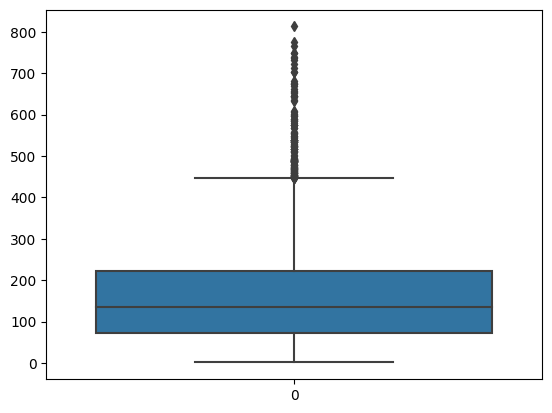

In [ ]:
sns.boxplot(df['num_critic_for_reviews'])

**Dropping the null values**

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(3887, 13)

**Finding the duplicated values**

In [ ]:
dup = df.duplicated().value_counts()
dup

False    3852
True       35
dtype: int64

Text(0.5, 1.0, 'Number of duplicated value')

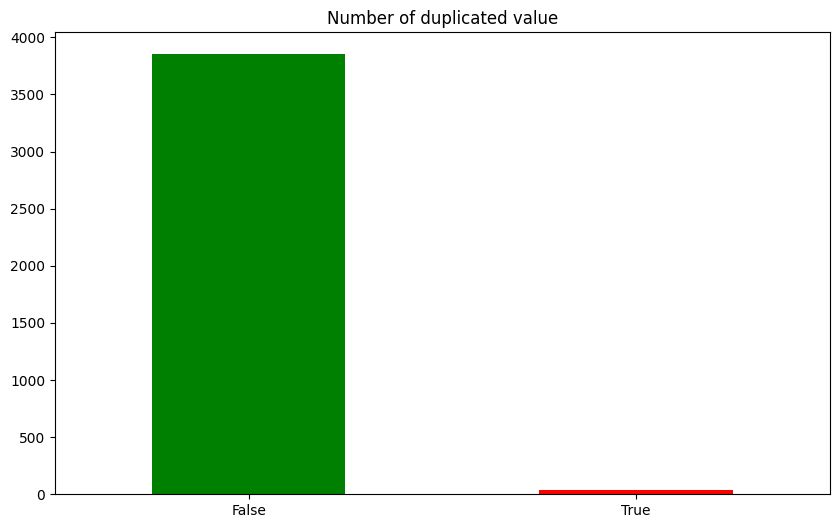

In [ ]:
plt.figure(figsize = (10,6))
dup.plot(kind = 'bar', color = ['g', 'r'])
plt.xticks(rotation = 360)
plt.title("Number of duplicated value")

**Dropping the duplicated values**

In [ ]:
df = df.drop_duplicates()
df.shape

(3852, 13)

In [ ]:
df.describe().style.background_gradient()

,num_critic_for_reviews,gross,num_voted_users,budget,title_year,imdb_score,movie_facebook_likes
count,3852.000000,3852.000000,3852.000000,3852.000000,3852.000000,3852.000000,3852.000000
mean,163.036085,50975542.371236,102442.806594,45253902.591121,2003.063344,6.463396,9091.931724
std,123.937734,69326510.589619,150309.201024,223449575.930116,10.010103,1.053939,21279.622377
min,1.000000,162.000000,5.000000,218.000000,1920.000000,1.600000,0.000000
25%,72.000000,6815231.500000,17308.500000,10000000.000000,1999.000000,5.900000,0.000000
50%,134.000000,27900000.000000,50588.000000,24000000.000000,2005.000000,6.600000,206.500000
75%,221.000000,65508766.750000,124194.250000,50000000.000000,2010.000000,7.200000,11000.000000
max,813.000000,760505847.000000,1689764.000000,12215500000.000000,2016.000000,9.300000,349000.000000


In [ ]:
df.isnull().sum()

director_name             0
num_critic_for_reviews    0
gross                     0
genres                    0
actor_1_name              0
movie_title               0
num_voted_users           0
num_user_for_reviews      0
language                  0
budget                    0
title_year                0
imdb_score                0
movie_facebook_likes      0
dtype: int64

**Data is clean and ready for visualization**

**B. Movies with highest profit**: Create a new column called profit which contains the difference of the two columns: gross and budget. Sort the column using the profit column as a reference. Plot profit (y-axis) vs budget (x-axis) and observe the outliers using the appropriate chart type.

**Task**: Find the movies with the highest profit?

**First let's create a column revenue**

In [ ]:
df['profit'] = df['gross'] - df['budget']
df.head()

<ipython-input-25-c3018e466a0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['profit'] = df['gross'] - df['budget']


,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237000000.0,2009.0,7.9,33000,523505847.0
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238,English,300000000.0,2007.0,7.1,0,9404152.0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994,English,245000000.0,2015.0,6.8,85000,-44925825.0
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701,English,250000000.0,2012.0,8.5,164000,198130642.0
5,Andrew Stanton,462.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738,English,263700000.0,2012.0,6.6,24000,-190641321.0


**Sorting the profit column in decending order**

In [ ]:
top_profitable_movie = df.sort_values(['profit'], axis = 0, ascending = False)
top_profitable_movie.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237000000.0,2009.0,7.9,33000,523505847.0
29,Colin Trevorrow,644.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290,English,150000000.0,2015.0,7.0,150000,502177271.0
26,James Cameron,315.0,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528,English,200000000.0,1997.0,7.7,26000,458672302.0
3024,George Lucas,282.0,460935665.0,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470,English,11000000.0,1977.0,8.7,33000,449935665.0
3080,Steven Spielberg,215.0,434949459.0,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515,English,10500000.0,1982.0,7.9,34000,424449459.0


In [ ]:
# Getting top 10 values
top_10_profit = top_profitable_movie.iloc[:10]
top_10_profit[['movie_title', 'profit']]

,movie_title,profit
0,Avatar,523505847.0
29,Jurassic World,502177271.0
26,Titanic,458672302.0
3024,Star Wars: Episode IV - A New Hope,449935665.0
3080,E.T. the Extra-Terrestrial,424449459.0
17,The Avengers,403279547.0
509,The Lion King,377783777.0
240,Star Wars: Episode I - The Phantom Menace,359544677.0
66,The Dark Knight,348316061.0
439,The Hunger Games,329999255.0


In [ ]:
top_10_profit.keys()

Index(['director_name', 'num_critic_for_reviews', 'gross', 'genres',
       'actor_1_name', 'movie_title', 'num_voted_users',
       'num_user_for_reviews', 'language', 'budget', 'title_year',
       'imdb_score', 'movie_facebook_likes', 'profit'],
      dtype='object')

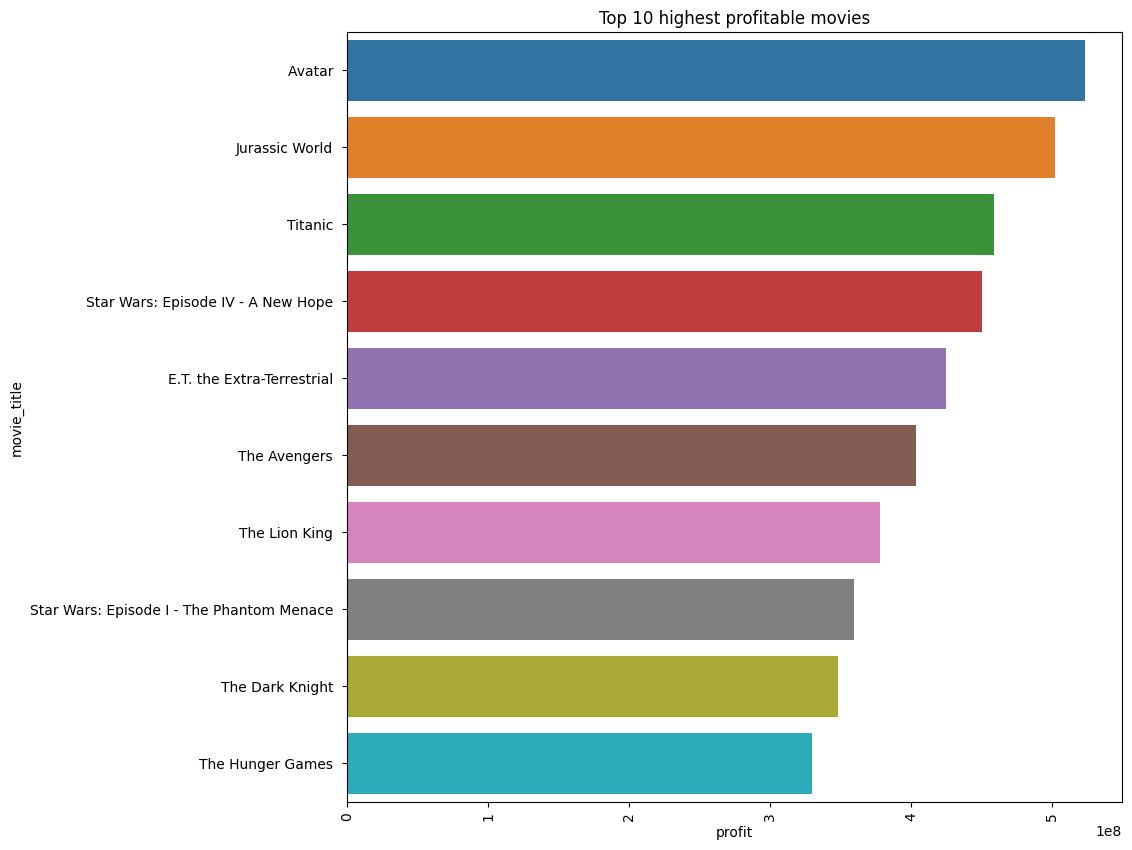

In [ ]:
plt.figure(figsize = (10,10))
sns.barplot(data = df, y = top_10_profit['movie_title'], x = top_10_profit['profit'])
plt.xticks(rotation = 90)
plt.title("Top 10 highest profitable movies")
plt.show()

**Observations**

Avatar is the most profitable movie which is followed by Jurrasic world.

**C. Top 250**: Create a new column IMDb_Top_250 and store the top 250 movies with the highest IMDb Rating (corresponding to the column: imdb_score). Also make sure that for all of these movies, the num_voted_users is greater than 25,000. Also add a Rank column containing the values 1 to 250 indicating the ranks of the corresponding films.

Extract all the movies in the IMDb_Top_250 column which are not in the English language and store them in a new column named Top_Foreign_Lang_Film. You can use your own imagination also!

**Task**: Find IMDB Top 250

In [ ]:
# Listing the data which has num_voted_users more than 25000
IMDb_Top_250 = df[df['num_voted_users'] > 25000]
IMDb_Top_250.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237000000.0,2009.0,7.9,33000,523505847.0
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238,English,300000000.0,2007.0,7.1,0,9404152.0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994,English,245000000.0,2015.0,6.8,85000,-44925825.0
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701,English,250000000.0,2012.0,8.5,164000,198130642.0
5,Andrew Stanton,462.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738,English,263700000.0,2012.0,6.6,24000,-190641321.0


In [ ]:
# SOrting the values in descending order
IMDb_Top_250 = IMDb_Top_250.sort_values(["imdb_score"],
                           axis = 0, ascending = False)
IMDb_Top_250.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
1937,Frank Darabont,199.0,28341469.0,Crime|Drama,Morgan Freeman,The Shawshank Redemption,1689764,4144,English,25000000.0,1994.0,9.3,108000,3341469.0
3466,Francis Ford Coppola,208.0,134821952.0,Crime|Drama,Al Pacino,The Godfather,1155770,2238,English,6000000.0,1972.0,9.2,43000,128821952.0
2837,Francis Ford Coppola,149.0,57300000.0,Crime|Drama,Robert De Niro,The Godfather: Part II,790926,650,English,13000000.0,1974.0,9.0,14000,44300000.0
66,Christopher Nolan,645.0,533316061.0,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667,English,185000000.0,2008.0,9.0,37000,348316061.0
4498,Sergio Leone,181.0,6100000.0,Western,Clint Eastwood,"The Good, the Bad and the Ugly",503509,780,Italian,1200000.0,1966.0,8.9,20000,4900000.0


**Getting top 250 movies with highest IMDb score**

In [ ]:
IMDb_Top_250 = IMDb_Top_250.iloc[:250]
pd.set_option('display.max_rows', 500)
IMDb_Top_250[['movie_title', 'imdb_score']]

,movie_title,imdb_score
1937,The Shawshank Redemption,9.3
3466,The Godfather,9.2
2837,The Godfather: Part II,9.0
66,The Dark Knight,9.0
4498,"The Good, the Bad and the Ugly",8.9
3355,Pulp Fiction,8.9
1874,Schindler's List,8.9
339,The Lord of the Rings: The Return of the King,8.9
836,Forrest Gump,8.8
97,Inception,8.8


In [ ]:
IMDb_Top_250.groupby(['imdb_score'])['movie_title'].value_counts().iloc[:250]

imdb_score  movie_title                                            
7.9         4 Months, 3 Weeks and 2 Days                               1
            Almost Famous                                              1
            Amour                                                      1
            Avatar                                                     1
            Before Midnight                                            1
            Big Hero 6                                                 1
            Boogie Nights                                              1
            Captain Phillips                                           1
            Children of Men                                            1
            Crash                                                      1
            Crouching Tiger, Hidden Dragon                             1
            Do the Right Thing                                         1
            E.T. the Extra-Terrestrial                  

<Axes: xlabel='imdb_score', ylabel='movie_title'>

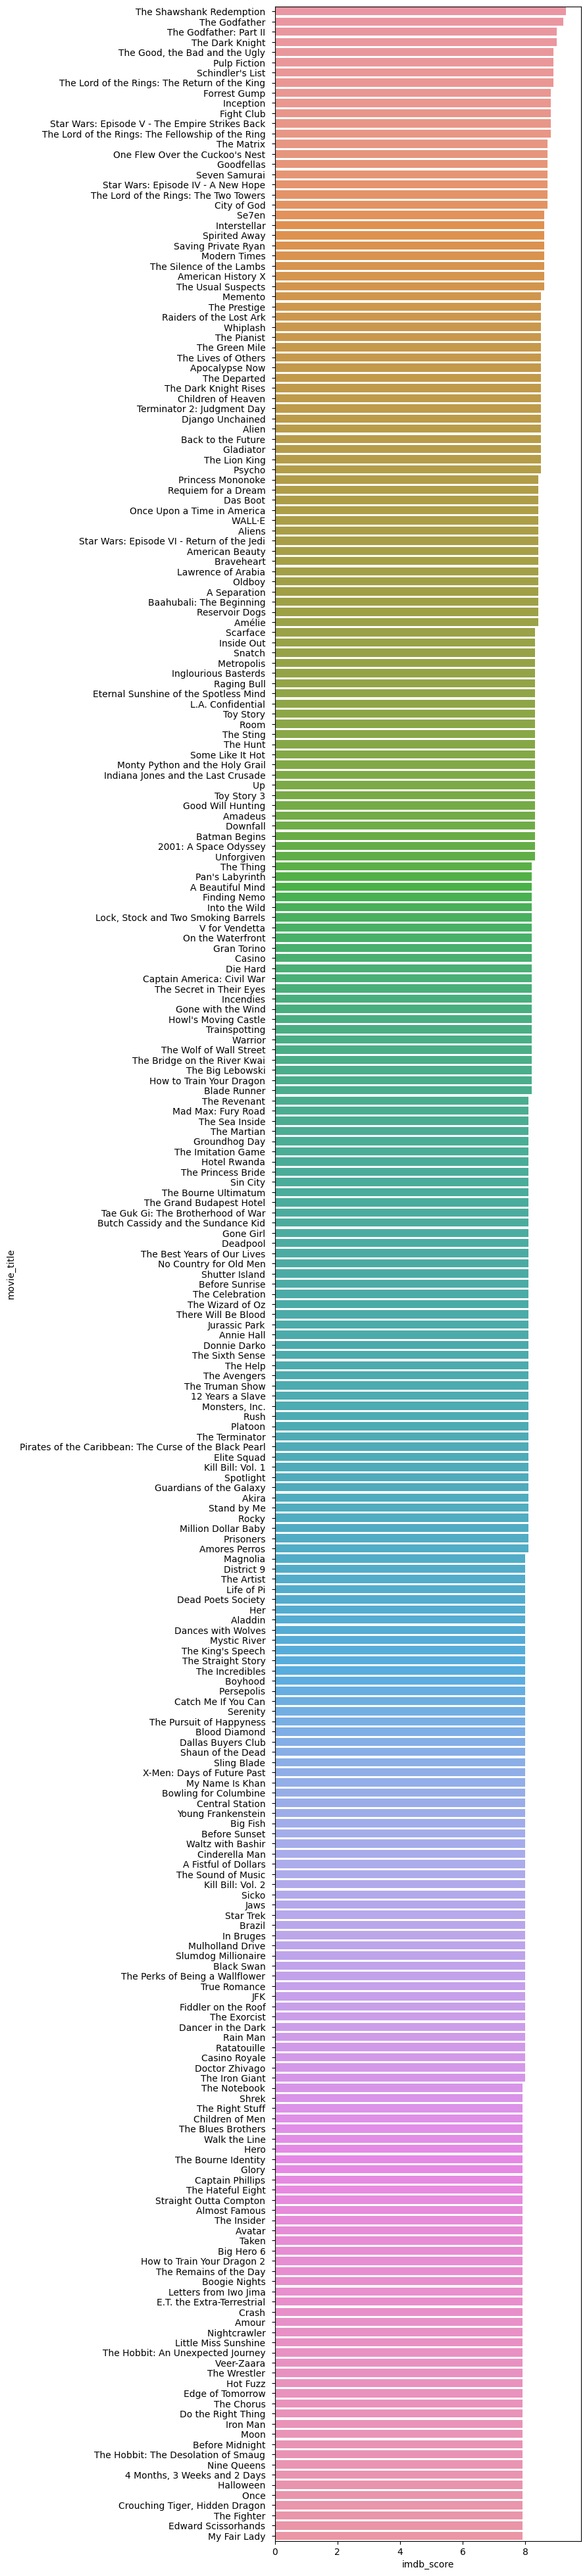

In [ ]:
plt.figure(figsize = (6,50))
sns.barplot(data = IMDb_Top_250, y = IMDb_Top_250['movie_title'], x = IMDb_Top_250['imdb_score'])

**C**. Extract all the movies in the IMDb_Top_250 column which are not in the English language and store them in a new column named Top_Foreign_Lang_Film. You can use your own imagination also!

**Task**: Find IMDB Top 250

**Listing with language which is not english**

In [ ]:
non_english = IMDb_Top_250[IMDb_Top_250['language'] != 'English']
non_english.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
4498,Sergio Leone,181.0,6100000.0,Western,Clint Eastwood,"The Good, the Bad and the Ugly",503509,780,Italian,1200000.0,1966.0,8.9,20000,4900000.0
4747,Akira Kurosawa,153.0,269061.0,Action|Adventure|Drama,Takashi Shimura,Seven Samurai,229012,596,Japanese,2000000.0,1954.0,8.7,11000,-1730939.0
4029,Fernando Meirelles,214.0,7563397.0,Crime|Drama,Alice Braga,City of God,533200,749,Portuguese,3300000.0,2002.0,8.7,28000,4263397.0
2373,Hayao Miyazaki,246.0,10049886.0,Adventure|Animation|Family|Fantasy,Bunta Sugawara,Spirited Away,417971,902,Japanese,19000000.0,2001.0,8.6,28000,-8950114.0
4259,Florian Henckel von Donnersmarck,215.0,11284657.0,Drama|Thriller,Sebastian Koch,The Lives of Others,259379,407,German,2000000.0,2006.0,8.5,39000,9284657.0


In [ ]:
non_english.shape

(38, 14)

<Axes: xlabel='imdb_score', ylabel='movie_title'>

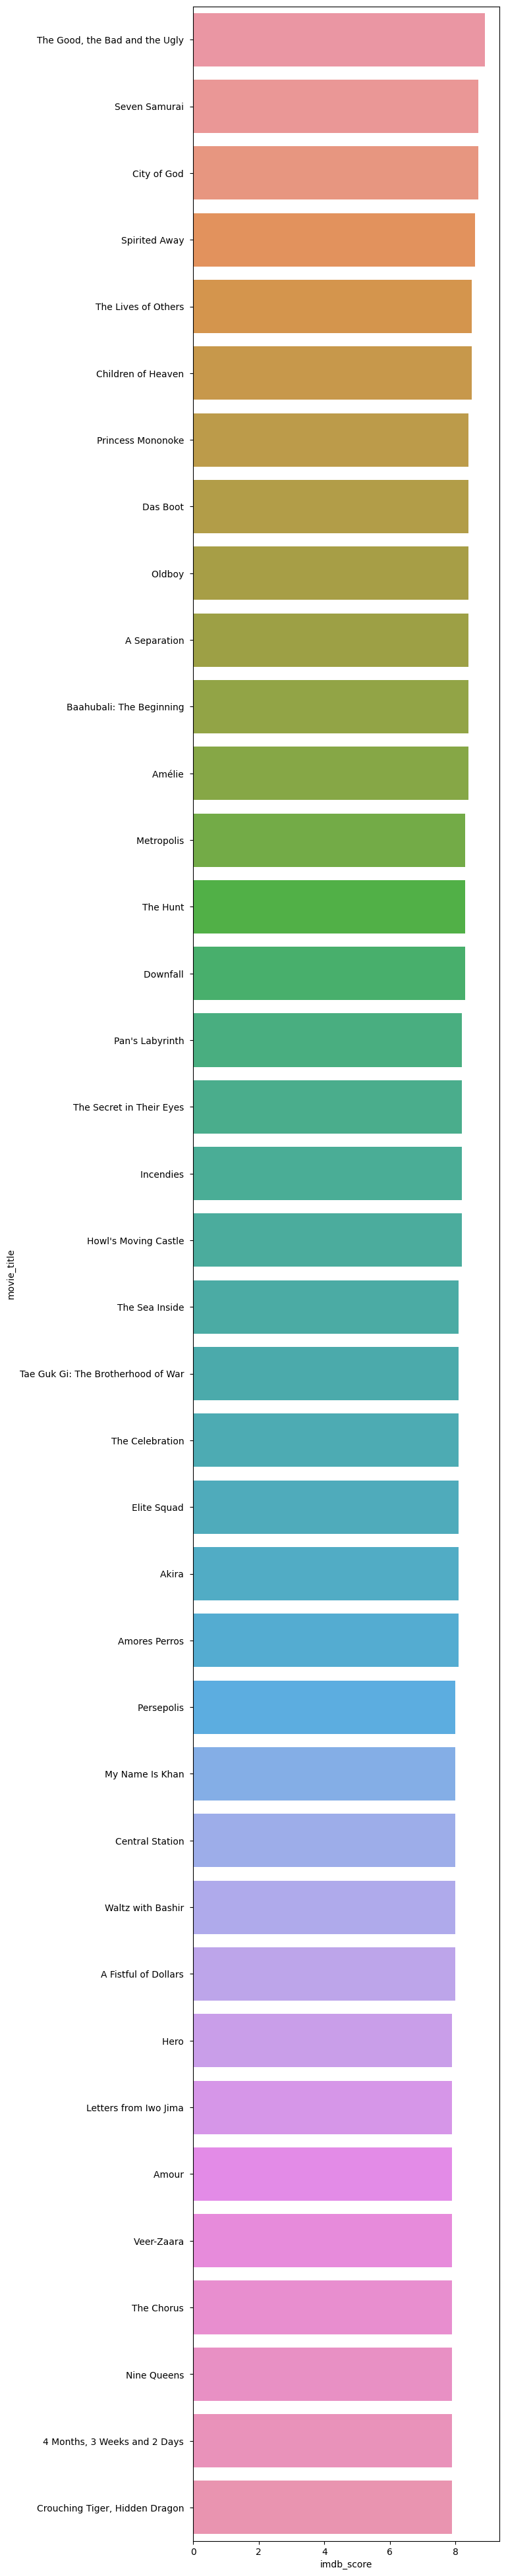

In [ ]:
plt.figure(figsize = (6,50))
sns.barplot(data = non_english, y = non_english['movie_title'], x = non_english['imdb_score'])

**D. Best Directors**: TGroup the column using the director_name column.

Find out the top 10 directors for whom the mean of imdb_score is the highest and store them in a new column top10director. In case of a tie in IMDb score between two directors, sort them alphabetically.

**Task**: Find the best directors

**Grouping with directors name and imdb score and sorting in descending order**

In [ ]:
top_10_director = df.groupby(['director_name'])['imdb_score'].mean().reset_index()
top_10_director = top_10_director.sort_values(['imdb_score'], axis = 0, ascending = False)
top_10_director.head(10)

,director_name,imdb_score
1672,Tony Kaye,8.600000
216,Charles Chaplin,8.600000
1015,Majid Majidi,8.500000
302,Damien Chazelle,8.500000
45,Alfred Hitchcock,8.500000
1437,Ron Fricke,8.500000
1495,Sergio Leone,8.433333
260,Christopher Nolan,8.425000
1033,Marius A. Markevicius,8.400000
1464,S.S. Rajamouli,8.400000


Text(0.5, 1.0, 'Top 10 IMDb movie director')

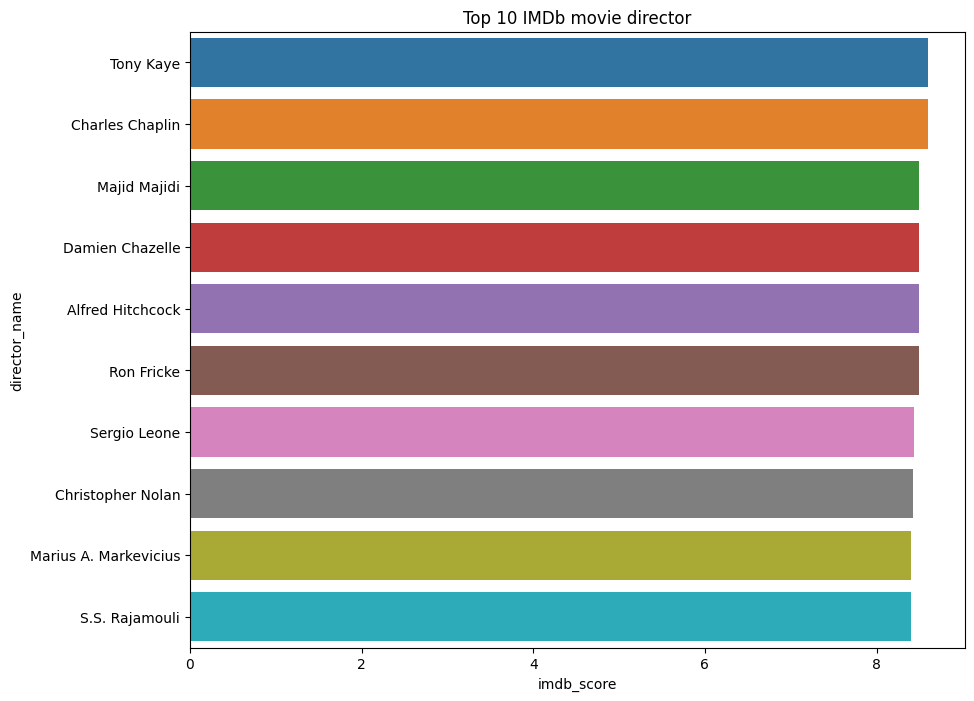

In [ ]:
plt.figure(figsize = (10,8))
sns.barplot(data = top_10_director, x = top_10_director['imdb_score'].iloc[:10],
                              y = top_10_director['director_name'].iloc[:10])
plt.title("Top 10 IMDb movie director")

**Observation**

Tony kane is the director with highest IMDb score

In [ ]:
df.duplicated().sum()

0

**E. Popular Genres**: Perform this step using the knowledge gained while performing previous steps.

**Task**: Find popular genres

In [ ]:
IMDb_Top_250.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
1937,Frank Darabont,199.0,28341469.0,Crime|Drama,Morgan Freeman,The Shawshank Redemption,1689764,4144,English,25000000.0,1994.0,9.3,108000,3341469.0
3466,Francis Ford Coppola,208.0,134821952.0,Crime|Drama,Al Pacino,The Godfather,1155770,2238,English,6000000.0,1972.0,9.2,43000,128821952.0
2837,Francis Ford Coppola,149.0,57300000.0,Crime|Drama,Robert De Niro,The Godfather: Part II,790926,650,English,13000000.0,1974.0,9.0,14000,44300000.0
66,Christopher Nolan,645.0,533316061.0,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667,English,185000000.0,2008.0,9.0,37000,348316061.0
4498,Sergio Leone,181.0,6100000.0,Western,Clint Eastwood,"The Good, the Bad and the Ugly",503509,780,Italian,1200000.0,1966.0,8.9,20000,4900000.0


**Sorting the top Genres with respect to IMDb score**

In [ ]:
popular_genres = df.groupby(['genres'])['imdb_score'].mean().reset_index()
popular_genres.sort_values(['imdb_score'], axis = 0, ascending = False, inplace = True)
popular_genres.head(15)

,genres,imdb_score
607,Crime|Drama|Fantasy|Mystery,8.50
281,Adventure|Animation|Drama|Family|Musical,8.50
60,Action|Adventure|Drama|Fantasy|War,8.40
290,Adventure|Animation|Fantasy,8.40
372,Adventure|Drama|Thriller|War,8.40
468,Biography|Drama|History|Music,8.30
647,Documentary|War,8.30
641,Documentary|Drama|Sport,8.30
258,Adventure|Animation|Comedy|Drama|Family|Fantasy,8.30
374,Adventure|Drama|War,8.25


Text(0.5, 1.0, 'Top 10 genres')

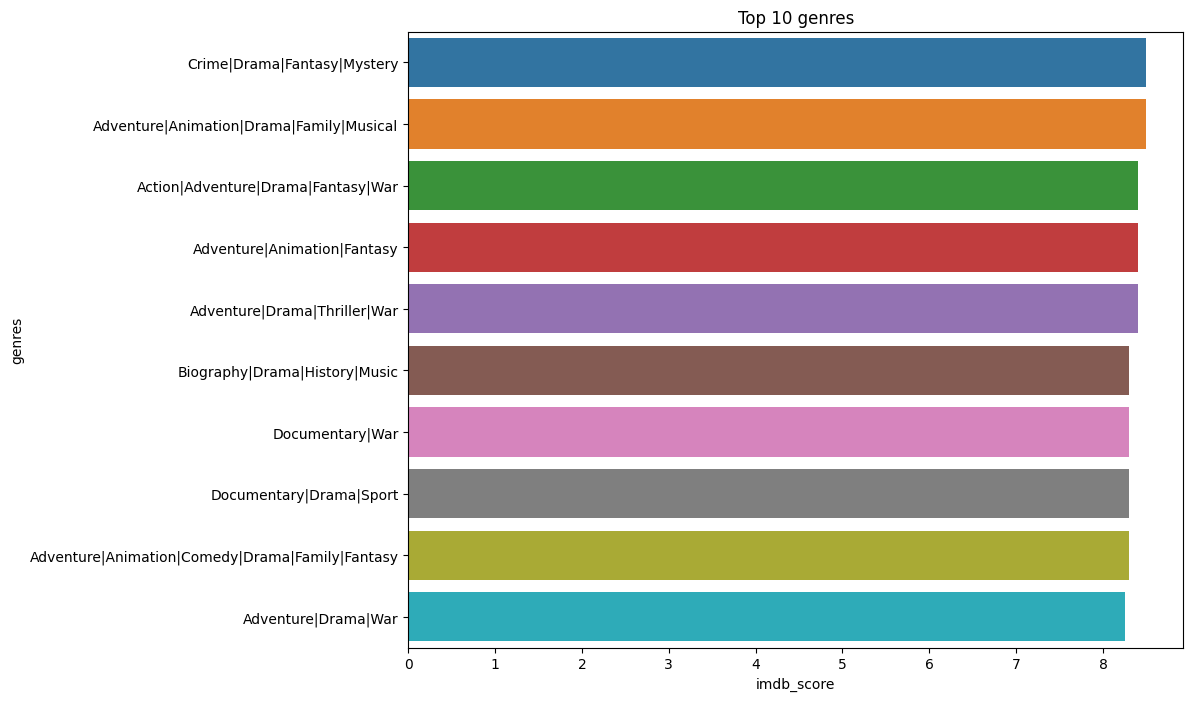

In [ ]:
plt.figure(figsize = (10,8))
sns.barplot(data = popular_genres, x = popular_genres['imdb_score'].iloc[:10],y = popular_genres['genres'].iloc[:10])
plt.title("Top 10 genres")

**Observation**

**Looks like Crime, drama, fantasy and mystery is the most liked genre**

**F. Charts**: Create three new columns namely, Meryl_Streep, Leo_Caprio, and Brad_Pitt which contain the movies in which the actors: 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' are the lead actors. Use only the actor_1_name column for extraction. Also, make sure that you use the names 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' for the said extraction.

Append the rows of all these columns and store them in a new column named Combined.

Group the combined column using the actor_1_name column.

Find the mean of the num_critic_for_reviews and num_users_for_review and identify the actors which have the highest mean.

Observe the change in number of voted users over decades using a bar chart. Create a column called decade which represents the decade to which every movie belongs to. For example, the title_year year 1923, 1925 should be stored as 1920s. Sort the column based on the column decade, group it by decade and find the sum of users voted in each decade. Store this in a new data frame called df_by_decade.

**Task**: Find the critic-favorite and audience-favorite actors

In [ ]:
df.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237000000.0,2009.0,7.9,33000,523505847.0
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238,English,300000000.0,2007.0,7.1,0,9404152.0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994,English,245000000.0,2015.0,6.8,85000,-44925825.0
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701,English,250000000.0,2012.0,8.5,164000,198130642.0
5,Andrew Stanton,462.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738,English,263700000.0,2012.0,6.6,24000,-190641321.0


**Creating column with Meryl Streep, Leonardo DiCaprio and Brad Pitt**

In [ ]:
Meryl_Streep = df[df['actor_1_name'] == 'Meryl Streep']
Leo_Caprio = df[df['actor_1_name'] == 'Leonardo DiCaprio']
Brad_Pitt = df[df['actor_1_name'] == 'Brad Pitt']

In [ ]:
df.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237000000.0,2009.0,7.9,33000,523505847.0
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238,English,300000000.0,2007.0,7.1,0,9404152.0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994,English,245000000.0,2015.0,6.8,85000,-44925825.0
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701,English,250000000.0,2012.0,8.5,164000,198130642.0
5,Andrew Stanton,462.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738,English,263700000.0,2012.0,6.6,24000,-190641321.0


**Appending Meryl streep with Leonardo dicaprio and Brad Pitt and storing it in combined variable**

In [ ]:
combined = Meryl_Streep.append([Leo_Caprio,Brad_Pitt])
combined.head()

<ipython-input-47-f2d52e287952>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined = Meryl_Streep.append([Leo_Caprio,Brad_Pitt])


,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
410,Nancy Meyers,187.0,112703470.0,Comedy|Drama|Romance,Meryl Streep,It's Complicated,69860,214,English,85000000.0,2009.0,6.6,0,27703470.0
1106,Curtis Hanson,42.0,46815748.0,Action|Adventure|Crime|Thriller,Meryl Streep,The River Wild,32544,69,English,45000000.0,1994.0,6.3,0,1815748.0
1204,Nora Ephron,252.0,94125426.0,Biography|Drama|Romance,Meryl Streep,Julie & Julia,79264,277,English,40000000.0,2009.0,7.0,13000,54125426.0
1408,David Frankel,208.0,124732962.0,Comedy|Drama|Romance,Meryl Streep,The Devil Wears Prada,286178,631,English,35000000.0,2006.0,6.8,0,89732962.0
1483,Robert Redford,227.0,14998070.0,Drama|Thriller|War,Meryl Streep,Lions for Lambs,41170,298,English,35000000.0,2007.0,6.2,0,-20001930.0


In [ ]:
df['num_critic_for_reviews'].describe()

count    3852.000000
mean      163.036085
std       123.937734
min         1.000000
25%        72.000000
50%       134.000000
75%       221.000000
max       813.000000
Name: num_critic_for_reviews, dtype: float64

**Changing the datatype of num_critic_for_reviews with int**

In [ ]:
combined.num_critic_for_reviews = combined.num_critic_for_reviews.astype(int)

**Finding the mean after grouping actor with num_critic_for_reviews**

In [ ]:
combined.groupby(['actor_1_name'])['num_critic_for_reviews'].mean().reset_index()

,actor_1_name,num_critic_for_reviews
0,Brad Pitt,245.000000
1,Leonardo DiCaprio,330.190476
2,Meryl Streep,181.454545


**Changing the datatype of num_user_for_reviews with int**

In [ ]:
combined['num_user_for_reviews'] = combined['num_user_for_reviews'].astype(int)

**Finding the mean after grouping actor with num_user_for_reviews**

In [ ]:
combined.groupby(['actor_1_name'])['num_user_for_reviews'].mean().reset_index()

,actor_1_name,num_user_for_reviews
0,Brad Pitt,742.352941
1,Leonardo DiCaprio,914.476190
2,Meryl Streep,297.181818


In [ ]:
combined.groupby(['actor_1_name'])['num_critic_for_reviews','num_user_for_reviews'].mean()

<ipython-input-53-a9ed58255e46>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  combined.groupby(['actor_1_name'])['num_critic_for_reviews','num_user_for_reviews'].mean()


,num_critic_for_reviews,num_user_for_reviews
actor_1_name,,
Brad Pitt,245.000000,742.352941
Leonardo DiCaprio,330.190476,914.476190
Meryl Streep,181.454545,297.181818


<ipython-input-54-8b413ec37ed1>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  combined.groupby(['actor_1_name'])['num_critic_for_reviews','num_user_for_reviews'].mean().plot(kind = 'bar',


(array([0, 1, 2]),
 [Text(0, 0, 'Brad Pitt'),
  Text(1, 0, 'Leonardo DiCaprio'),
  Text(2, 0, 'Meryl Streep')])

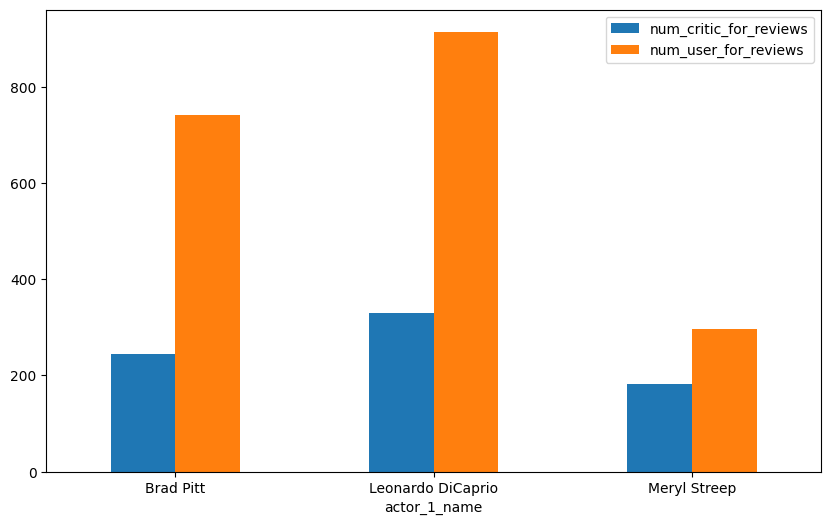

In [ ]:
combined.groupby(['actor_1_name'])['num_critic_for_reviews','num_user_for_reviews'].mean().plot(kind = 'bar',
                                                                                                figsize = (10,6))
plt.xticks(rotation = 360)

**Observation**

Looks like Leonardo DiCaprio has the highest user and critic reviews.

In [ ]:
df.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237000000.0,2009.0,7.9,33000,523505847.0
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238,English,300000000.0,2007.0,7.1,0,9404152.0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994,English,245000000.0,2015.0,6.8,85000,-44925825.0
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701,English,250000000.0,2012.0,8.5,164000,198130642.0
5,Andrew Stanton,462.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738,English,263700000.0,2012.0,6.6,24000,-190641321.0


**Changing the title_year with int**

In [ ]:
df['title_year'] = df['title_year'].astype(int)

**Grouping it with title year after indexing it in nearest to 10ths value**

In [ ]:
df_num_voted = df.groupby([(df['title_year'] // 10) * 10])['num_voted_users'].sum().reset_index()
df_num_voted

,title_year,num_voted_users
0,1920,116392
1,1930,804839
2,1940,230838
3,1950,678336
4,1960,2983442
5,1970,8524102
6,1980,19987476
7,1990,69735679
8,2000,170908241
9,2010,120640346


<Axes: xlabel='title_year', ylabel='num_voted_users'>

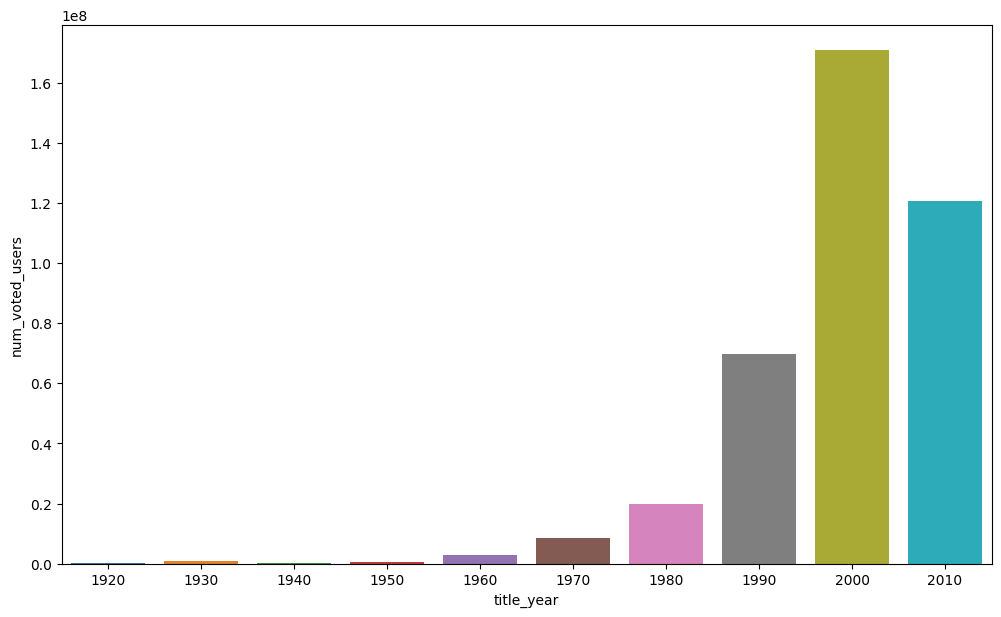

In [ ]:
plt.figure(figsize = (12,7))
sns.barplot(data = df_num_voted, x = df_num_voted['title_year'], y = df_num_voted['num_voted_users'])

**Observation**

In 2000 people voted the most followed by 2010